Original Data Sample:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Data with simulated missing 'total_bill':
     total_bill   tip     sex smoker   day    time  size
24          NaN  3.18    Male     No   Sat  Dinner     2
6           NaN  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192         NaN  2.56    Male    Yes  Thur   Lunch     2
124         NaN  2.52  Female     No  Thur   Lunch     2
9           NaN  3.23    Male     No   Sun  Dinner     2
101         NaN  3.00  Female    Yes   Fr

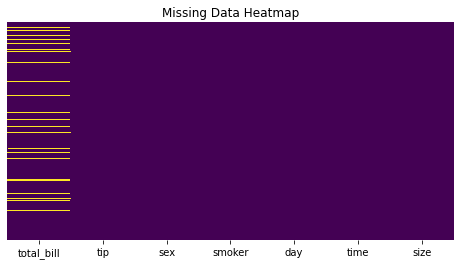


After dropping rows, shape: (220, 7)

After filling missing 'total_bill' with mean (20.00):
     total_bill   tip     sex smoker   day    time  size
24    20.003364  3.18    Male     No   Sat  Dinner     2
6     20.003364  2.00    Male     No   Sun  Dinner     2
153   20.003364  2.00    Male     No   Sun  Dinner     4
211   20.003364  5.16    Male    Yes   Sat  Dinner     4
198   20.003364  2.00  Female    Yes  Thur   Lunch     2
176   20.003364  2.00    Male    Yes   Sun  Dinner     2
192   20.003364  2.56    Male    Yes  Thur   Lunch     2
124   20.003364  2.52  Female     No  Thur   Lunch     2
9     20.003364  3.23    Male     No   Sun  Dinner     2
101   20.003364  3.00  Female    Yes   Fri  Dinner     2
45    20.003364  3.00    Male     No   Sun  Dinner     2
233   20.003364  1.47    Male     No   Sat  Dinner     2
117   20.003364  1.50  Female     No  Thur   Lunch     2
177   20.003364  2.00    Male    Yes   Sun  Dinner     2
82    20.003364  1.83  Female     No  Thur   Lunch  

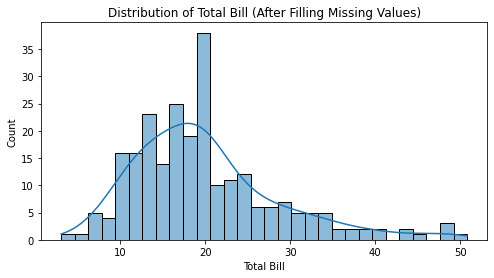

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(url)

print("Original Data Sample:")
print(data.head())

# Step 2: Simulate missing data for demonstration
# Randomly set 10% of 'total_bill' values to NaN
np.random.seed(42)  # for reproducibility
missing_indices = data.sample(frac=0.1).index
data.loc[missing_indices, 'total_bill'] = np.nan

print("\nData with simulated missing 'total_bill':")
print(data.loc[missing_indices])

# Step 3: Detect missing data
print("\nMissing data summary:")
print(data.isnull().sum())

# Visualize missing data matrix
plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Step 4: Handle missing data

# Option 1: Drop rows with missing values
data_dropped = data.dropna()
print(f"\nAfter dropping rows, shape: {data_dropped.shape}")

# Option 2: Fill missing 'total_bill' with mean value
mean_total_bill = data['total_bill'].mean()
data_filled = data.copy()
data_filled['total_bill'].fillna(mean_total_bill, inplace=True)
print(f"\nAfter filling missing 'total_bill' with mean ({mean_total_bill:.2f}):")
print(data_filled.loc[missing_indices])

# Step 5: Visualization after filling missing data
plt.figure(figsize=(8,4))
sns.histplot(data_filled['total_bill'], kde=True, bins=30)
plt.title('Distribution of Total Bill (After Filling Missing Values)')
plt.xlabel('Total Bill')
plt.show()